In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
new_df = df.sample(100000,random_state=2)
new_df

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   
...        ...     ...     ...   
147622  147622  185363  232946   
353951  353951   23995  483033   
251765  251765  177088  357433   
150383  150383  221786  236690   
165218  165218  256600  256601   

                                                question1  \
398782  What is the best marketing automation tool for...   
115086  I am poor but I want to invest. What should I do?   
327711  I am from India and live abroad. I met a guy f...   
367788  Why do so many people in the U.S. hate the sou...   
151235                Consequences of Bhopal gas tragedy?   
...                                                   ...   
147622                            Why do you live a life?   
353951  Why are Golden Retriever dogs with blue eyes s...   
251765               How do I learn computer practically?   
150383  I want to start a new business in India (appro...   
165218  How do I become successful in medical insuranc...   

                                                question2  is_duplicate  
398782  What is the best marketing automation tool for...             1  
115086  I am quite poor and I want to be very rich. Wh...             0  
327711  T.I.E.T to Thapar University to Thapar Univers...             0  
367788  My boyfriend doesnt feel guilty when he hurts ...             0  
151235  What was the reason behind the Bhopal gas trag...             0  
...                                                   ...           ...  
147622  Why do people live? What is reason for you to ...             1  
353951  How do I train Golden Retriever dogs with blue...             0  
251765  What is the best way to learn computer languages?             0  
150383  What are some good ideas for small industries ...             0  
165218        How can I be productive in insurance sales?             0  

[100000 rows x 6 columns]

In [4]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [5]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [6]:
%%time
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

CPU times: total: 21.4 s
Wall time: 22 s


In [7]:
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  
398782  what is the best marketing automation tool for...             1  
115086  i am quite poor and i want to be very rich  wh...             0  
327711  t i e t to thapar university to thapar univers...             0  
367788  my boyfriend doesnt feel guilty when he hurts ...             0  
151235  what was the reason behind the bhopal gas tragedy             0

In [8]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [9]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  
398782      75      76            13            13  
115086      48      56            13            16  
327711     104     119            28            21  
367788      58     145            14            32  
151235      34      49             5             9

In [10]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [11]:
list(map(lambda word: word.lower().strip(),"i am gon i am done".split(" ")))

['i', 'am', 'gon', 'i', 'am', 'done']

In [12]:
set((map(lambda word: word.lower().strip(),"i am gon i am done".split(" "))))

{'am', 'done', 'gon', 'i'}

In [13]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  
398782      75      76            13            13           12  
115086      48      56            13            16            8  
327711     104     119            28            21            4  
367788      58     145            14            32            1  
151235      34      49             5             9            3

In [14]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [15]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  
398782      75      76            13            13           12          26  
115086      48      56            13            16            8          24  
327711     104     119            28            21            4          38  
367788      58     145            14            32            1          34  
151235      34      49             5             9            3          13

In [16]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
398782      75      76            13            13           12          26   
115086      48      56            13            16            8          24   
327711     104     119            28            21            4          38   
367788      58     145            14            32            1          34   
151235      34      49             5             9            3          13   

        word_share  
398782        0.46  
115086        0.33  
327711        0.11  
367788        0.03  
151235        0.23

In [17]:
import nltk
from pathlib import Path 
data_dir = Path("data")
data_dir.mkdir(exist_ok=True)

# Download punkt into this folder
nltk.download("punkt", download_dir=str(data_dir))
nltk.download("punkt_tab", download_dir=str(data_dir))
# Download stopwords into this folder
nltk.download("stopwords", download_dir=str(data_dir))

# Tell NLTK to look inside your custom folder
nltk.data.path.append(str(data_dir))

[nltk_data] Downloading package punkt to data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [19]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [20]:
print(new_df.shape)
new_df.head()

(100000, 17)


id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
398782      75      76            13            13           12          26   
115086      48      56            13            16            8          24   
327711     104     119            28            21            4          38   
367788      58     145            14            32            1          34   
151235      34      49             5             9            3          13   

        word_share  fuzz_ratio  fuzz_partial_ratio  token_sort_ratio  \
398782        0.46          99                  99                99   
115086        0.33          69                  67                65   
327711        0.11          26                  29                34   
367788        0.03          29                  41                23   
151235        0.23          55                  70                48   

        token_set_ratio  
398782               99  
115086               74  
327711               43  
367788               30  
151235               69

In [21]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [22]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [23]:
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...  token_sort_ratio  \
398782      75      76            13            13  ...                99   
115086      48      56            13            16  ...                65   
327711     104     119            28            21  ...                34   
367788      58     145            14            32  ...                23   
151235      34      49             5             9  ...                48   

        token_set_ratio   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
398782               99  0.874989  0.874989  0.999980  0.999980  0.923070   
115086               74  0.666644  0.499988  0.714276  0.624992  0.583328   
327711               43  0.000000  0.000000  0.428565  0.272725  0.149999   
367788               30  0.000000  0.000000  0.000000  0.000000  0.000000   
151235               69  0.749981  0.599988  0.000000  0.000000  0.599988   

         ctc_max  last_word_eq  first_word_eq  
398782  0.923070           1.0            1.0  
115086  0.466664           1.0            1.0  
327711  0.115384           0.0            0.0  
367788  0.000000           0.0            0.0  
151235  0.333330           1.0            0.0  

[5 rows x 25 columns]

In [24]:
#!pip install distance

In [25]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features
    

In [26]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [27]:
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   cwc_max   csc_min  \
398782      75      76            13            13  ...  0.874989  0.999980   
115086      48      56            13            16  ...  0.499988  0.714276   
327711     104     119            28            21  ...  0.000000  0.428565   
367788      58     145            14            32  ...  0.000000  0.000000   
151235      34      49             5             9  ...  0.599988  0.000000   

         csc_max   ctc_min   ctc_max  last_word_eq  first_word_eq  \
398782  0.999980  0.923070  0.923070           1.0            1.0   
115086  0.624992  0.583328  0.466664           1.0            1.0   
327711  0.272725  0.149999  0.115384           0.0            0.0   
367788  0.000000  0.000000  0.000000           0.0            0.0   
151235  0.000000  0.599988  0.333330           1.0            0.0   

        abs_len_diff  mean_len  longest_substr_ratio  
398782           0.0      13.0              0.855263  
115086           3.0      13.5              0.224490  
327711           6.0      23.0              0.047619  
367788          17.0      21.5              0.050847  
151235           4.0       7.0              0.542857  

[5 rows x 28 columns]

### EDA

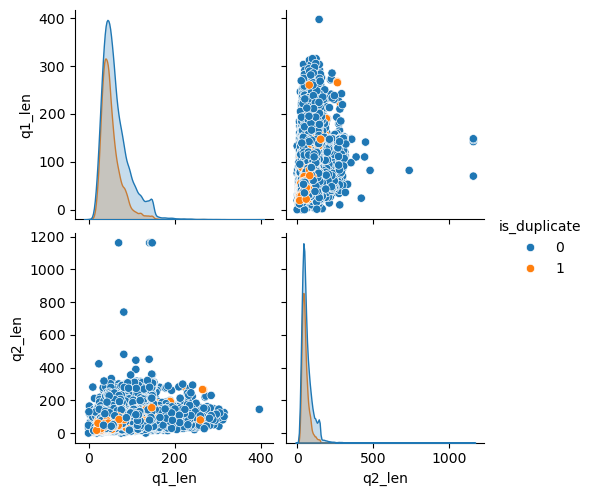

In [28]:
sns.pairplot(new_df[['q1_len', 'q2_len', 'is_duplicate']],hue='is_duplicate')

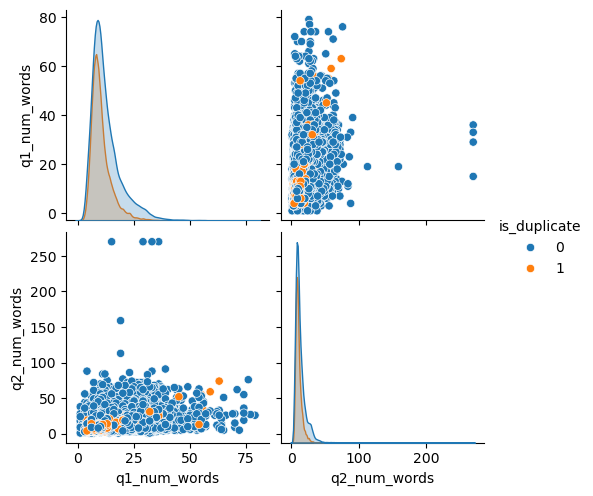

In [29]:
sns.pairplot(new_df[['q1_num_words', 'q2_num_words', 'is_duplicate']],hue='is_duplicate')

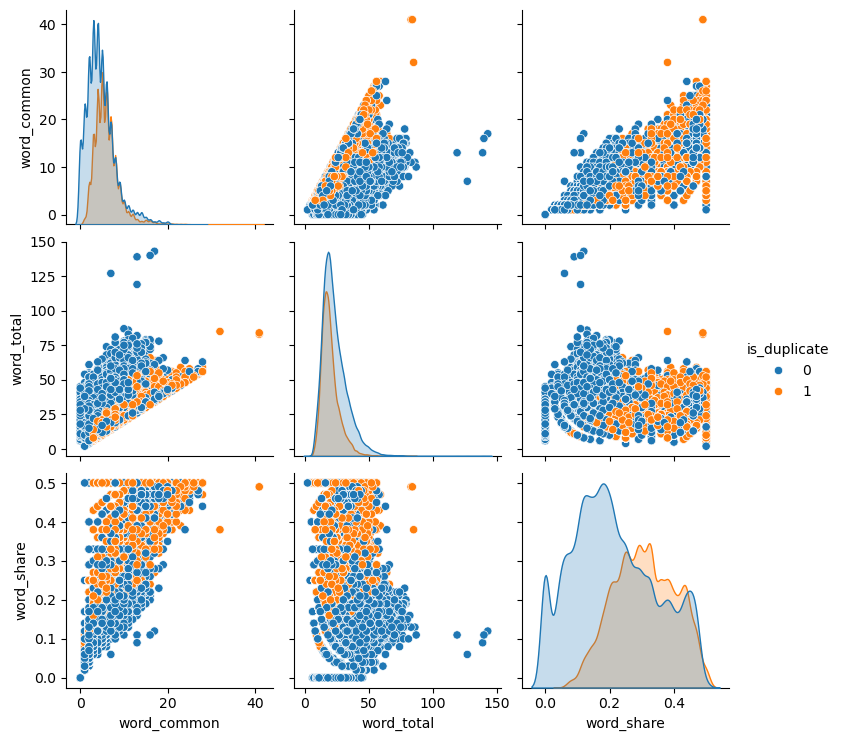

In [30]:
sns.pairplot(new_df[['word_common', 'word_total', 'word_share', 'is_duplicate']],hue='is_duplicate')

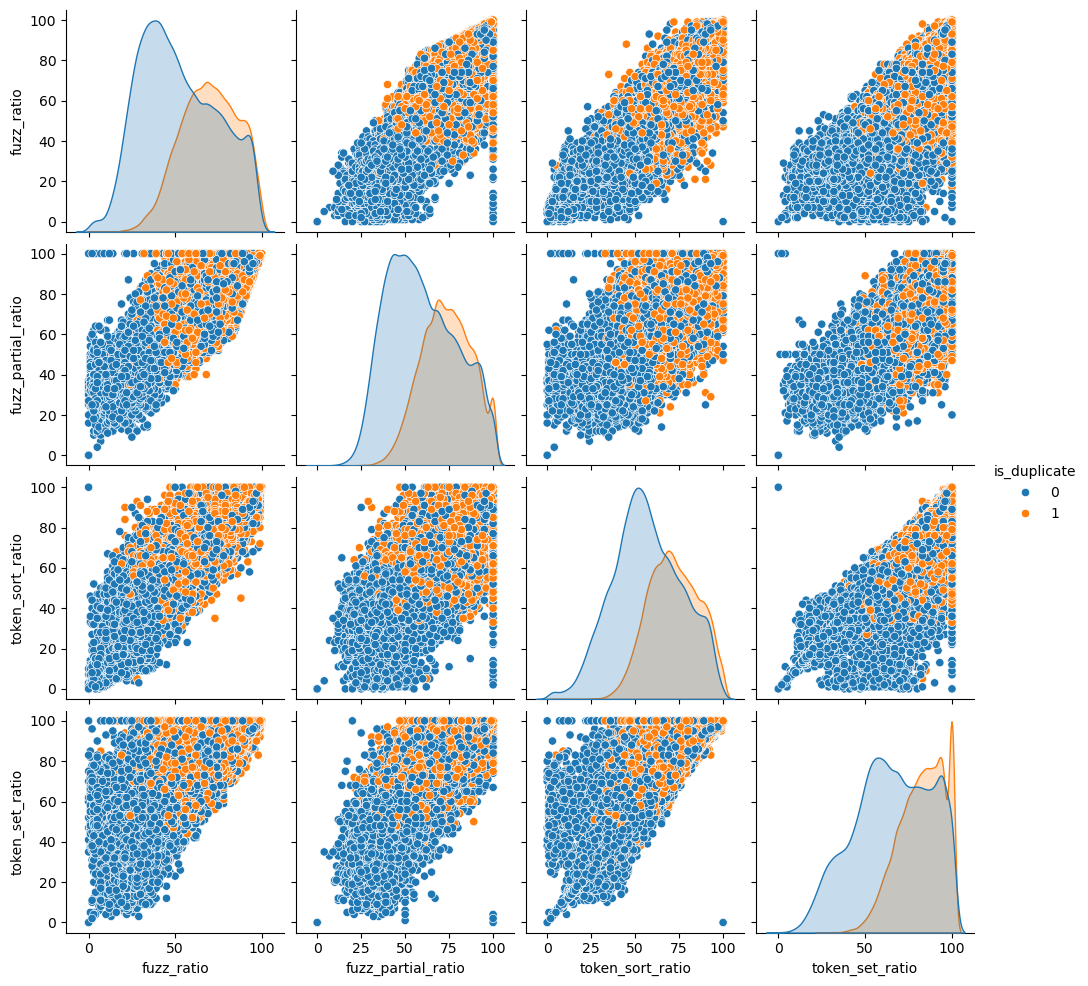

In [31]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

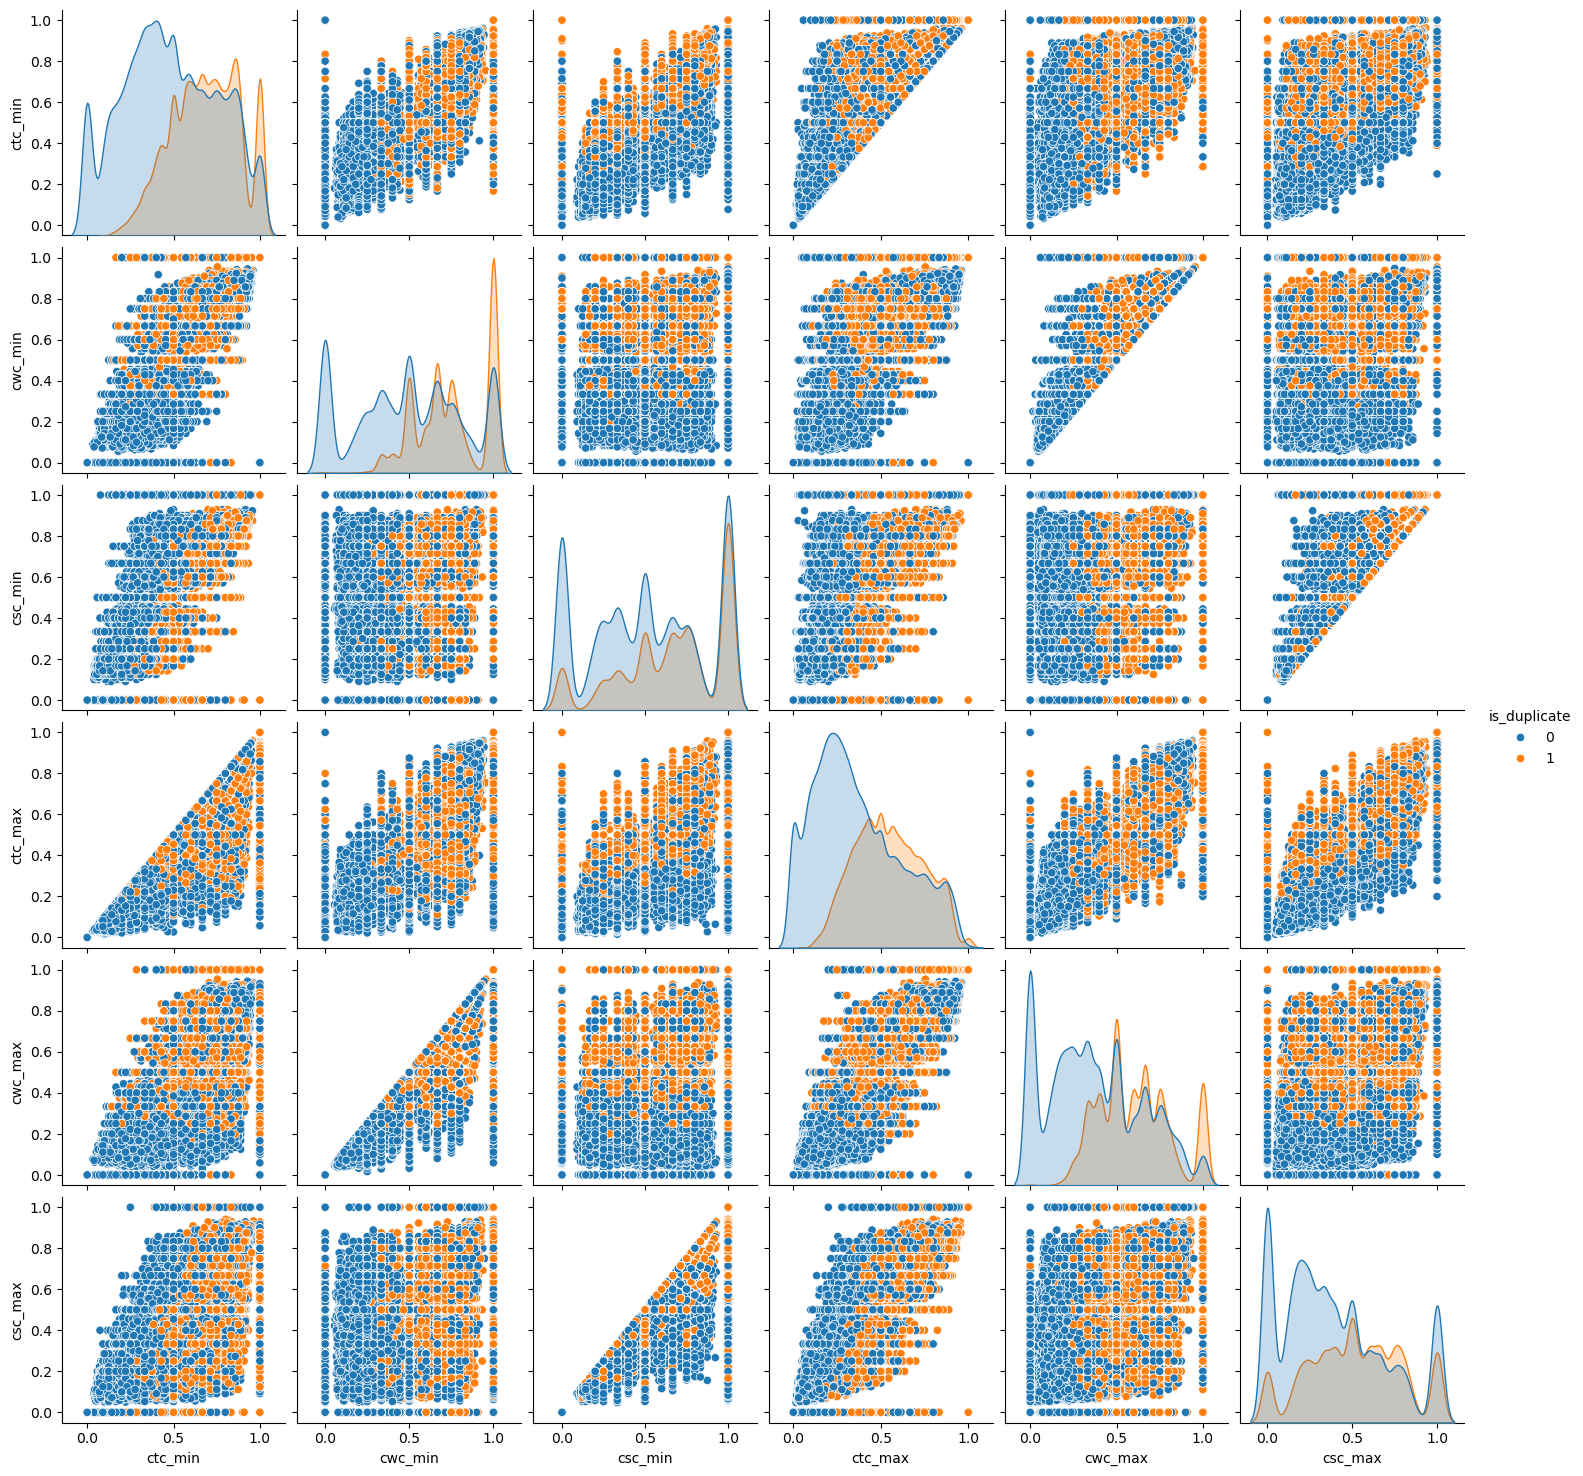

In [32]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

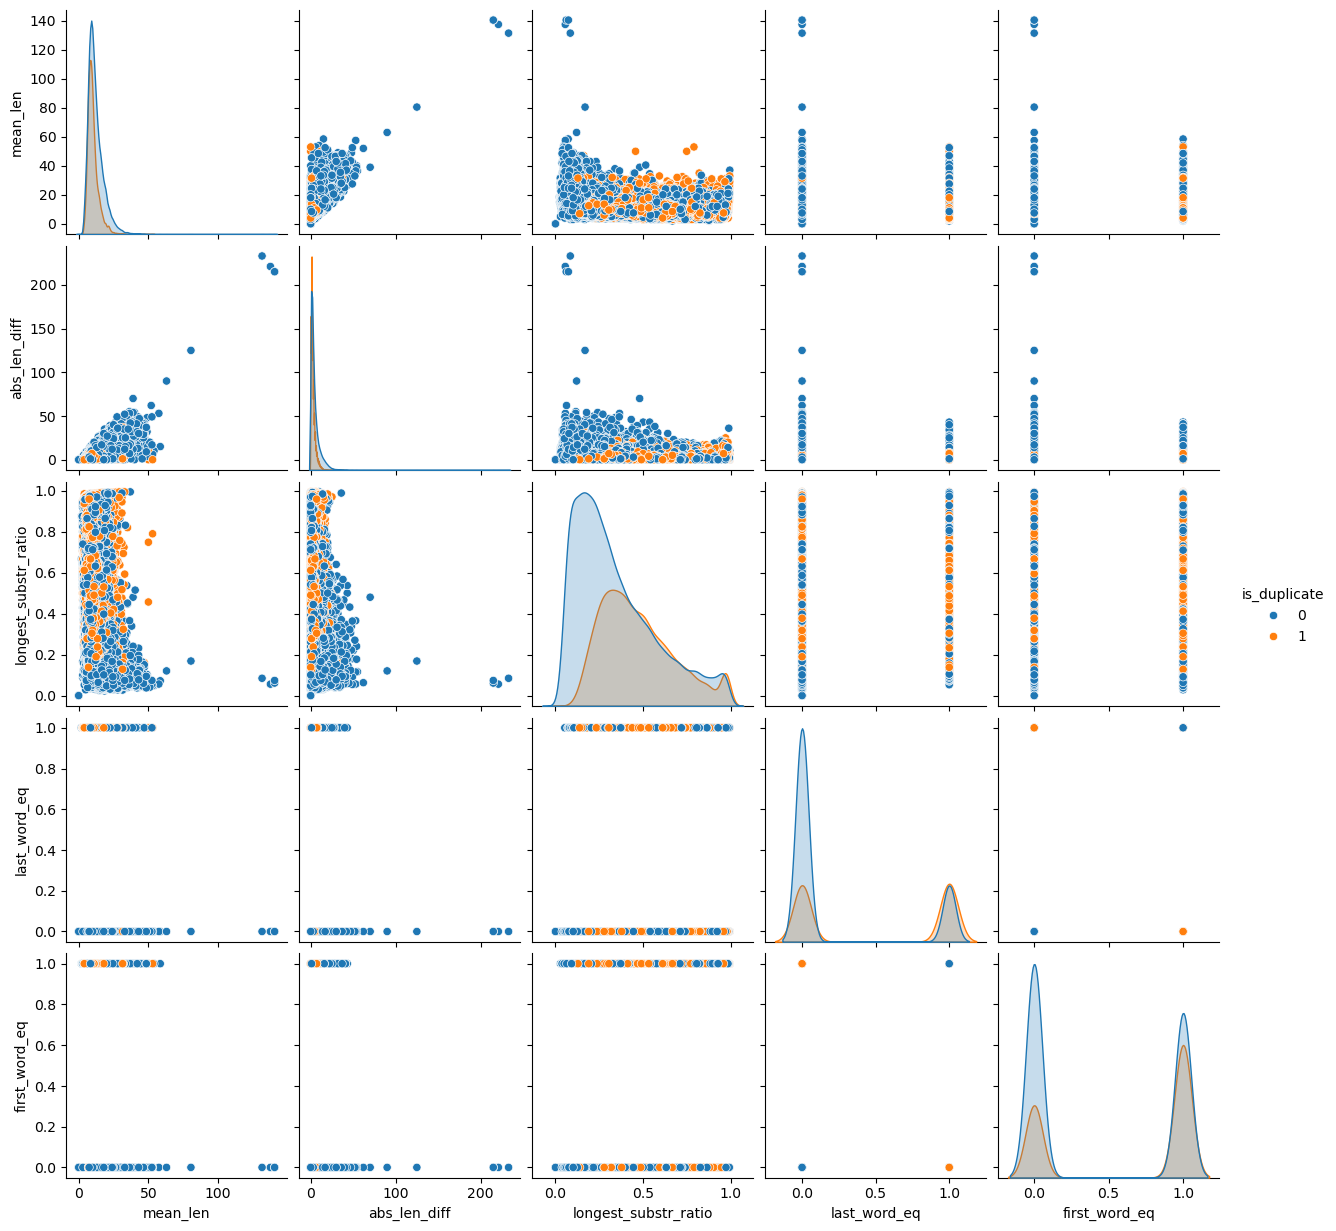

In [33]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio','last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

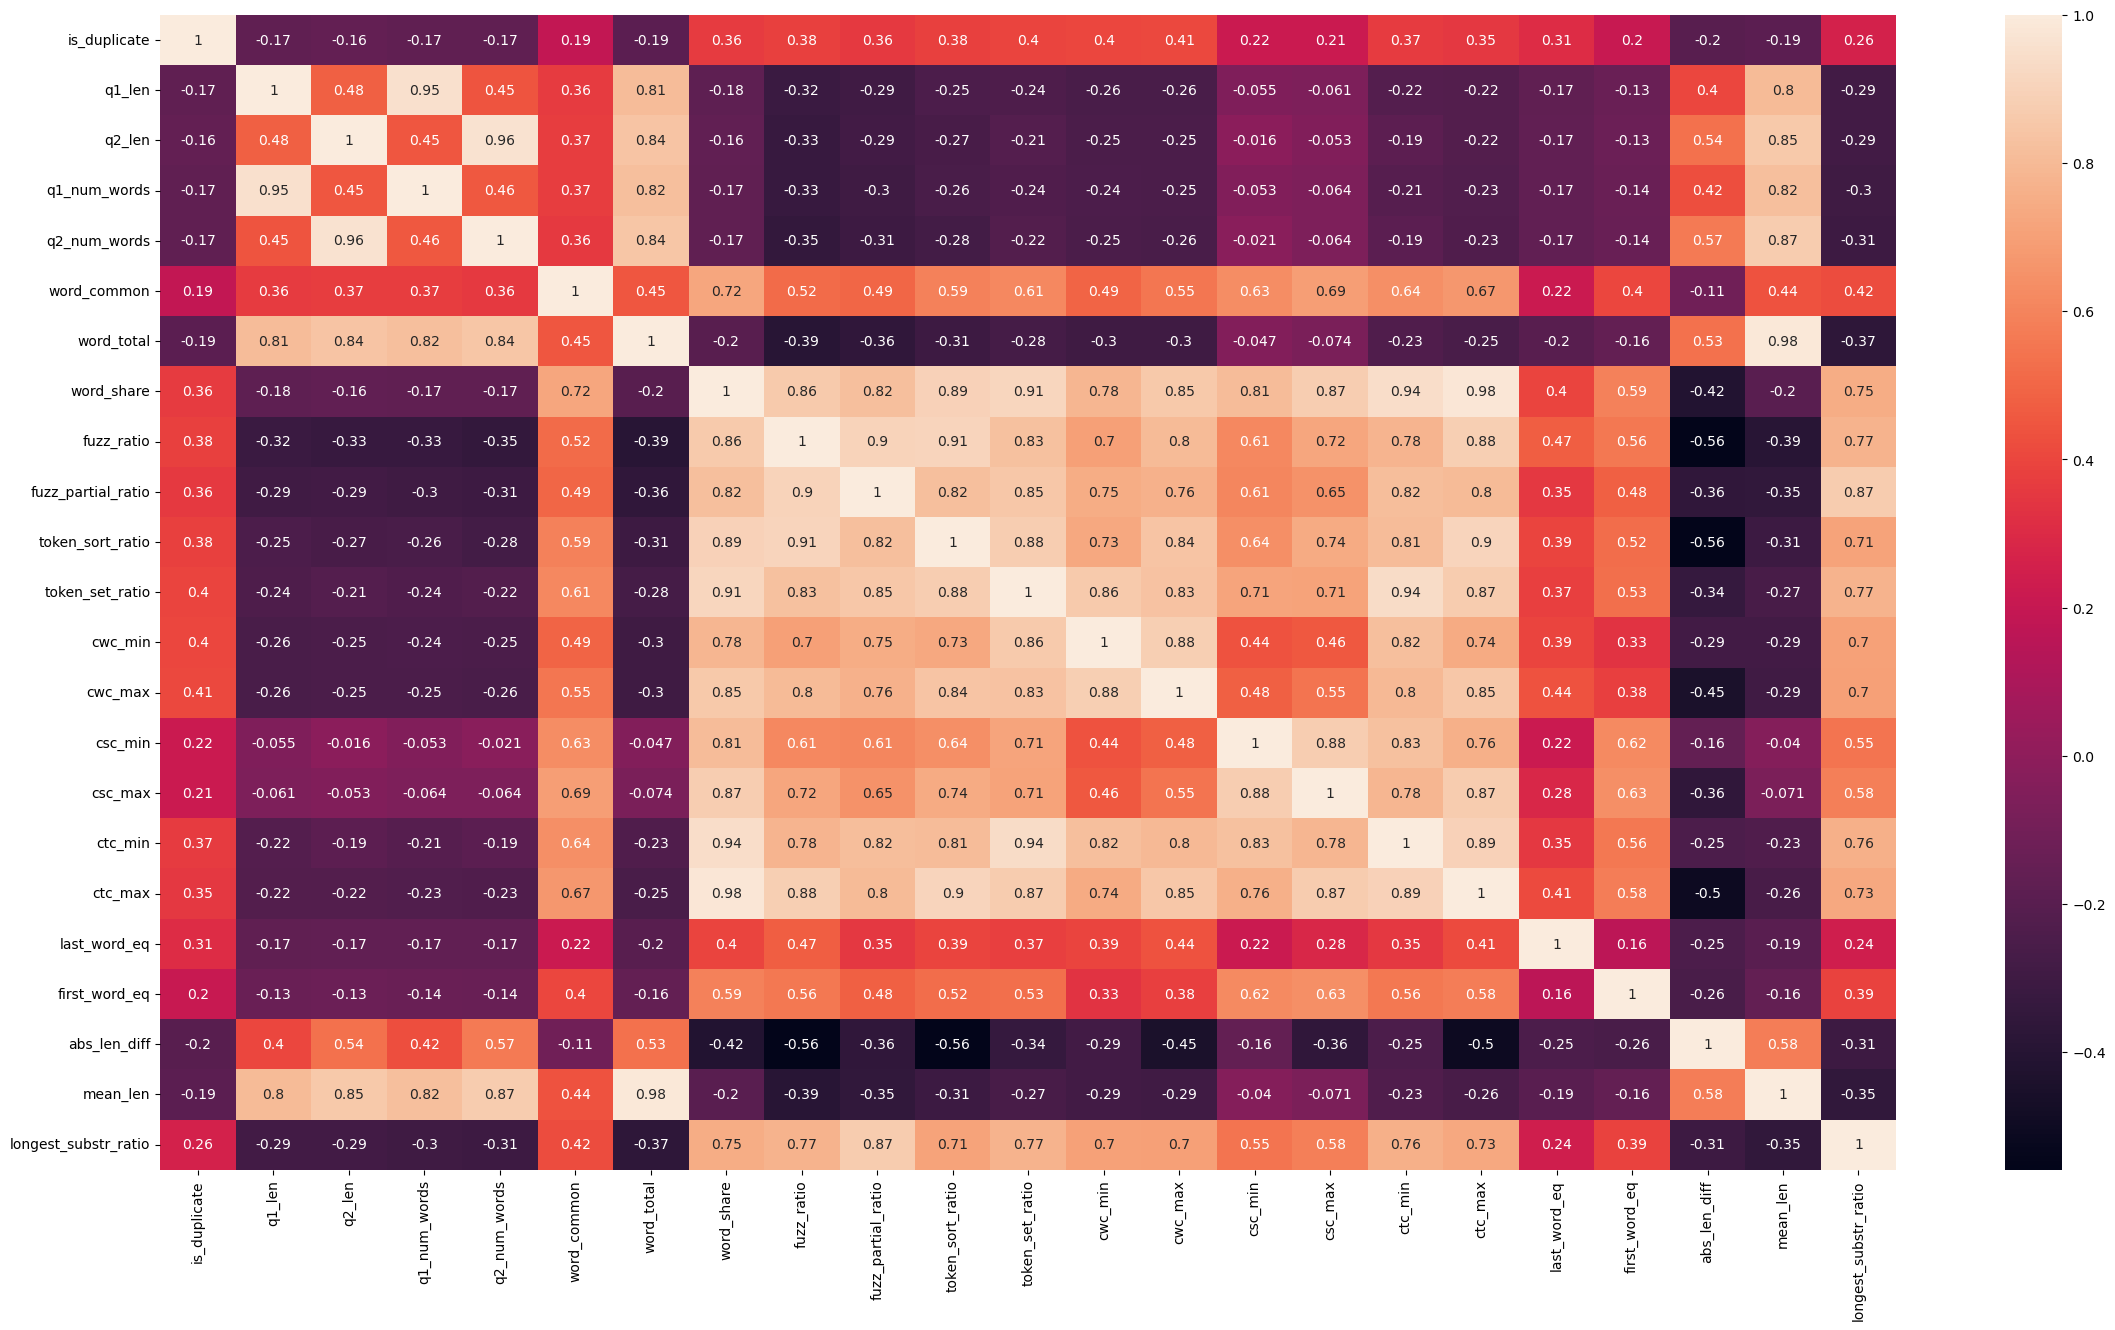

In [34]:
plt.figure(figsize=(28,15))
sns.heatmap(new_df.drop(['id', 'qid1',	'qid2',	'question1', 'question2',],axis=1).corr(), annot=True)
plt.show()

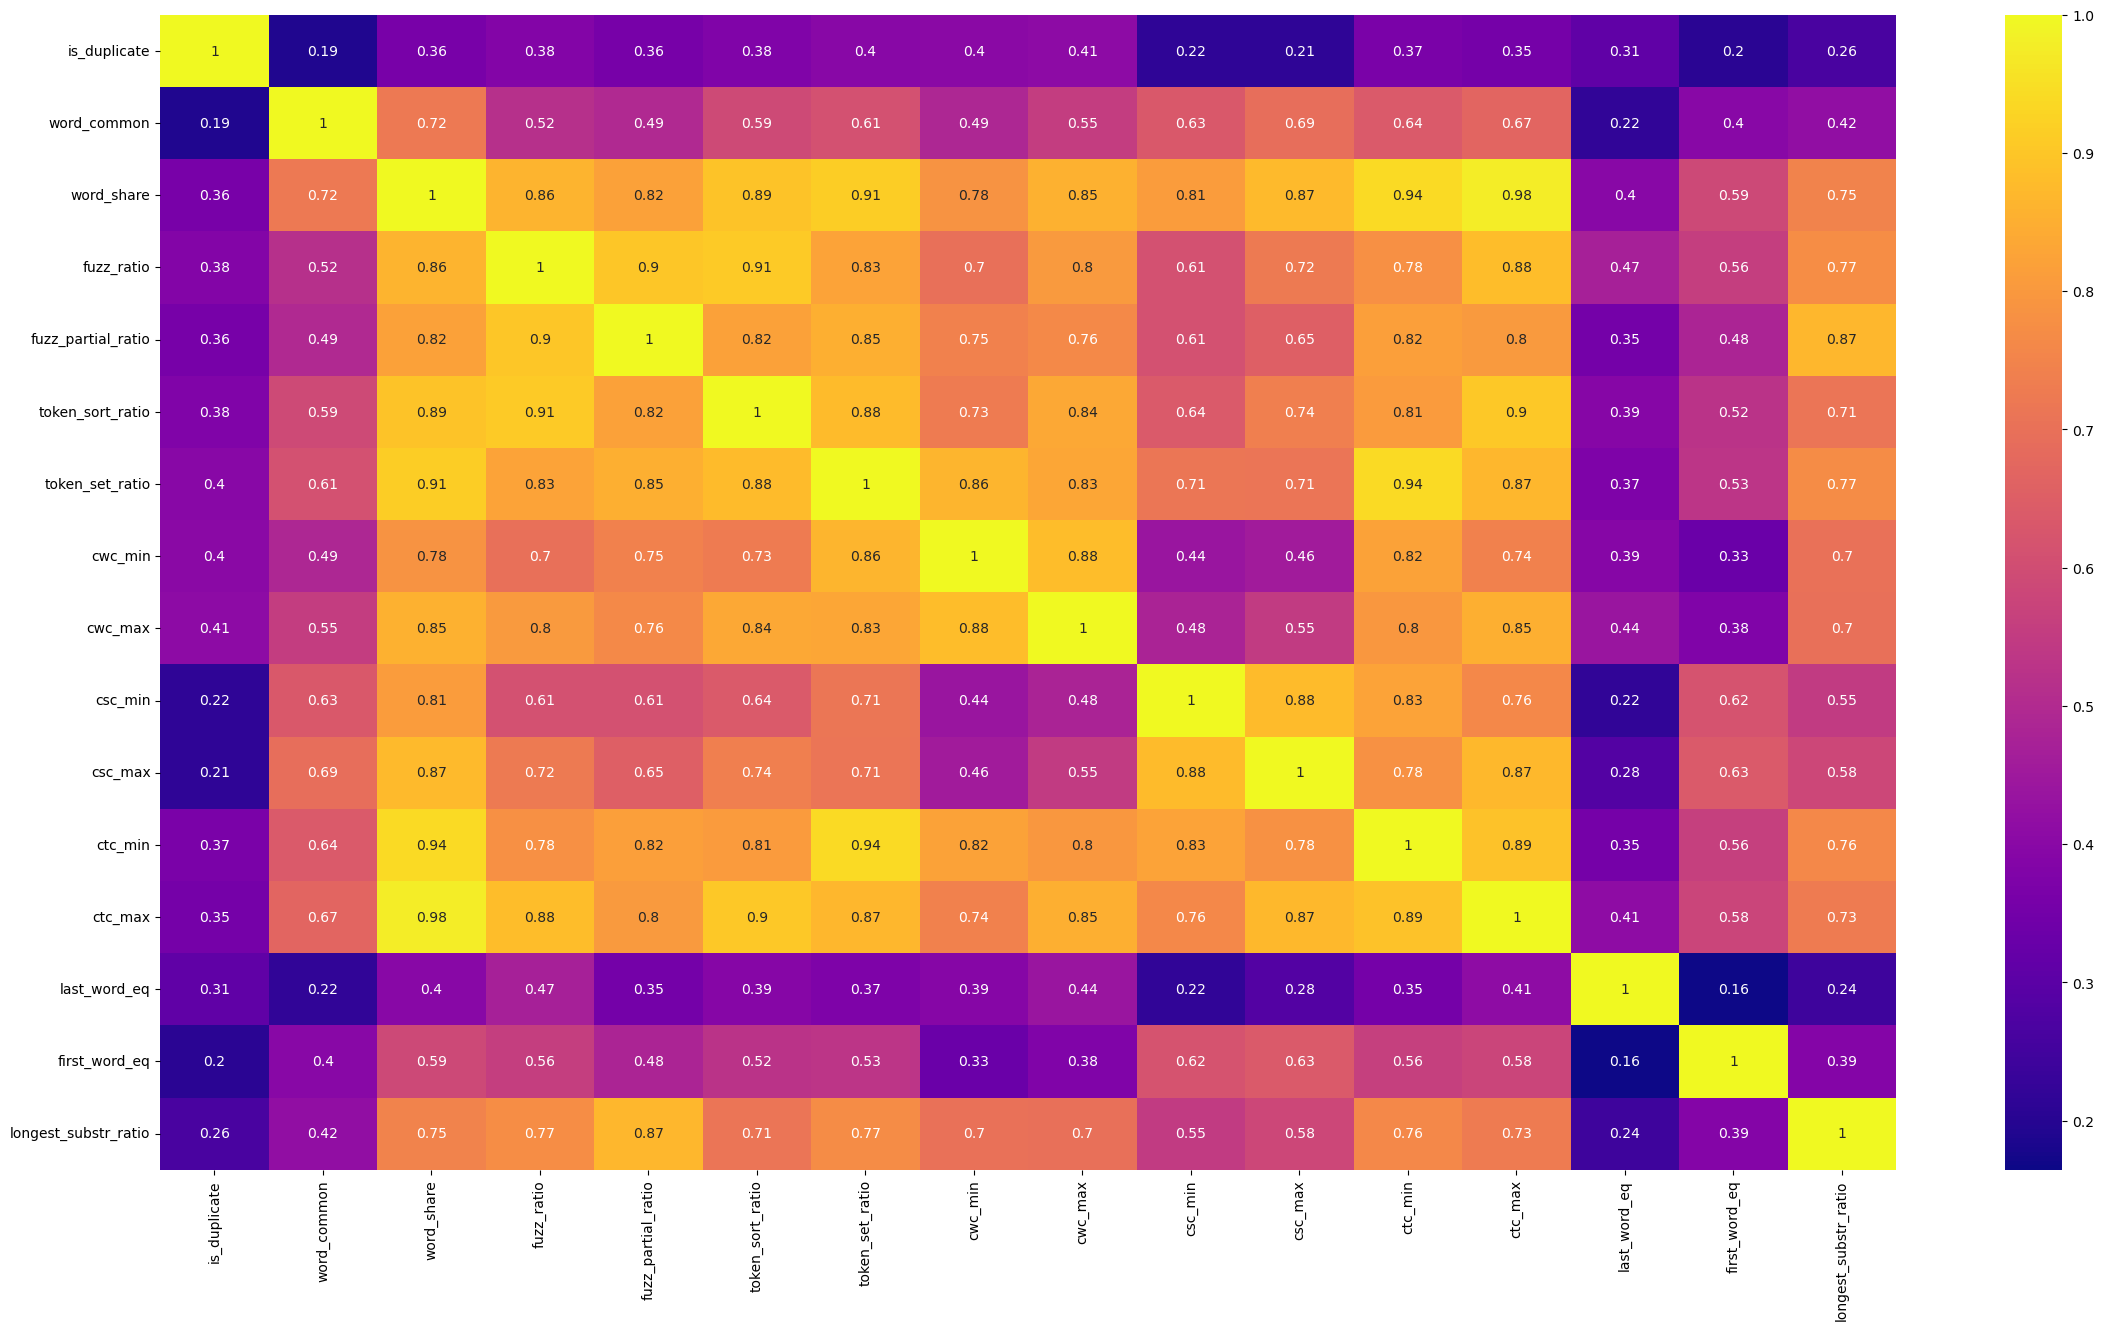

In [35]:
plt.figure(figsize=(28,15))
sns.heatmap(new_df.drop(['id', 'qid1',	'qid2',	'question1', 'question2','q1_num_words', 'q2_num_words','q1_len','q2_len','word_total','mean_len', 'abs_len_diff'],axis=1).corr(), annot=True,cmap='plasma')
plt.show()

In [36]:
selected=new_df.drop(['id', 'qid1',	'qid2',	'question1', 'question2','q1_num_words', 'q2_num_words','q1_len','q2_len','word_total','mean_len', 'abs_len_diff','is_duplicate'],axis=1)
selected.head()

word_common  word_share  fuzz_ratio  fuzz_partial_ratio  \
398782           12        0.46          99                  99   
115086            8        0.33          69                  67   
327711            4        0.11          26                  29   
367788            1        0.03          29                  41   
151235            3        0.23          55                  70   

        token_sort_ratio  token_set_ratio   cwc_min   cwc_max   csc_min  \
398782                99               99  0.874989  0.874989  0.999980   
115086                65               74  0.666644  0.499988  0.714276   
327711                34               43  0.000000  0.000000  0.428565   
367788                23               30  0.000000  0.000000  0.000000   
151235                48               69  0.749981  0.599988  0.000000   

         csc_max   ctc_min   ctc_max  last_word_eq  first_word_eq  \
398782  0.999980  0.923070  0.923070           1.0            1.0   
115086  0.624992  0.583328  0.466664           1.0            1.0   
327711  0.272725  0.149999  0.115384           0.0            0.0   
367788  0.000000  0.000000  0.000000           0.0            0.0   
151235  0.000000  0.599988  0.333330           1.0            0.0   

        longest_substr_ratio  
398782              0.855263  
115086              0.224490  
327711              0.047619  
367788              0.050847  
151235              0.542857

In [37]:
target=pd.DataFrame(new_df.is_duplicate)
target.head()

is_duplicate
398782             1
115086             0
327711             0
367788             0
151235             0

# Visualization of points of all features

In [38]:
X=new_df.drop(['id', 'qid1',	'qid2',	'question1', 'question2'],axis=1)
X=X.sample(2000,random_state=23)
y=pd.DataFrame(X.is_duplicate)

In [39]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    random_state=101,
    n_iter=1500,
    perplexity=500
).fit_transform(X.drop(['is_duplicate'],axis=1))

  File "D:\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "D:\anaconda\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\subprocess.py", line 1554, in _execute_child
    hp, ht, pid, t

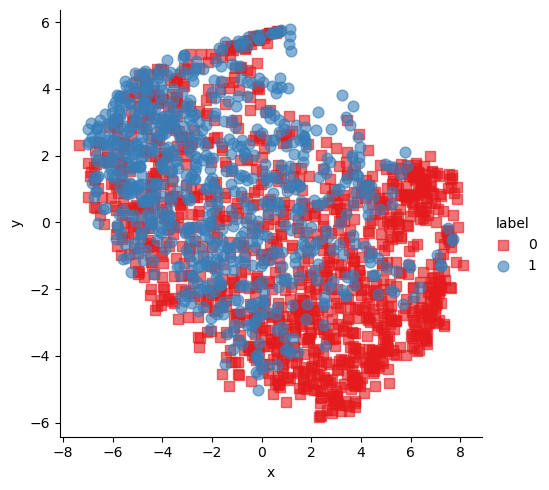

In [40]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y['is_duplicate']})

# draw the plot in appropriate place in the grid
ax=sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False,palette="Set1",markers=['s','o'], scatter_kws={'s': 60, 'alpha': 0.6  })

Text(0.5, 1.0, 'all features in 2D')

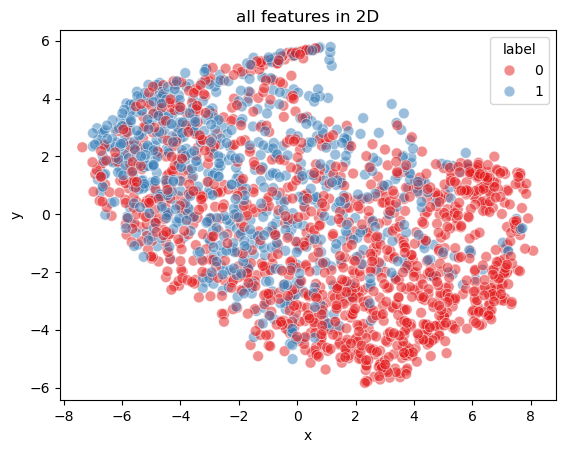

In [41]:
ax=sns.scatterplot(data=x_df, x='x', y='y', hue='label',palette="Set1",markers=['s','o'],s= 60, alpha= 0.5,)
ax.set_title("all features in 2D")

In [42]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1500,
    verbose=2,
    angle=0.5,
    perplexity=500
).fit_transform(X.drop(['is_duplicate'],axis=1))

[t-SNE] Computing 1501 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.166s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 25.580292
[t-SNE] Computed conditional probabilities in 0.897s
[t-SNE] Iteration 50: error = 45.1045036, gradient norm = 0.0000000 (50 iterations in 1.376s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: 45.104504
[t-SNE] Iteration 100: error = 0.5556245, gradient norm = 0.0125047 (50 iterations in 1.316s)
[t-SNE] Iteration 150: error = 0.1528418, gradient norm = 0.0027664 (50 iterations in 1.480s)
[t-SNE] Iteration 200: error = 0.1422751, gradient norm = 0.0022100 (50 iterations in 1.415s)
[t-SNE] Iteration 250: error = 0.1508051, gradient norm = 0.0008752 (50 iterations in 1.444s)
[t-SNE] Iteration 300: error = 0.154540

In [43]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y['is_duplicate'],
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

# Visualization of points of selected features

In [44]:
X=new_df.drop(['id', 'qid1',	'qid2',	'question1', 'question2','q1_num_words', 'q2_num_words','q1_len','q2_len','word_total','mean_len', 'abs_len_diff'],axis=1)
X=X.sample(2000,random_state=23)
y=pd.DataFrame(X.is_duplicate)

In [45]:
tsne2d = TSNE(
    n_components=2,
    random_state=101,
    n_iter=1500,
    perplexity=500
).fit_transform(X.drop(['is_duplicate'],axis=1))

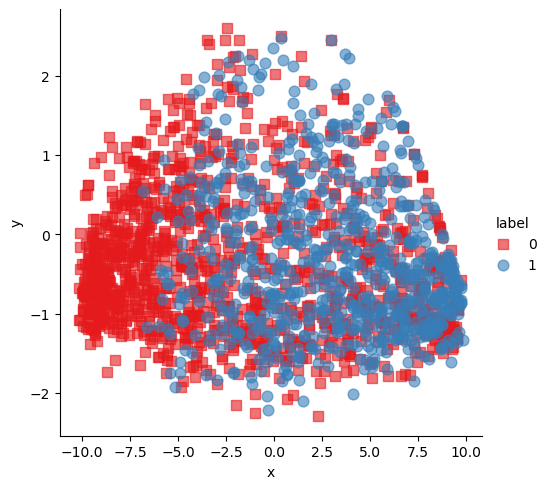

In [46]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y['is_duplicate']})

# draw the plot in appropriate place in the grid
ax=sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False,palette="Set1",markers=['s','o'], scatter_kws={'s': 60, 'alpha': 0.6  })

Text(0.5, 1.0, 'selected features in 2D')

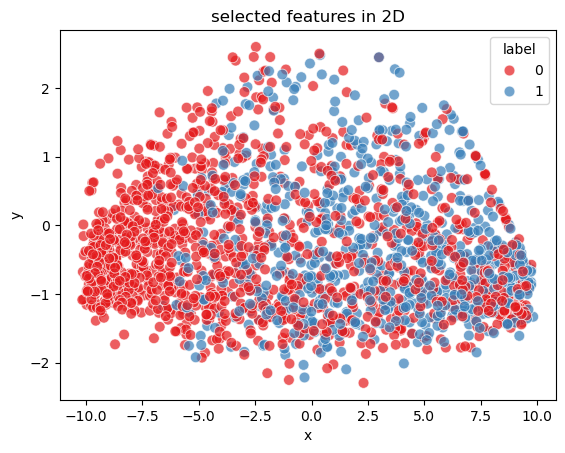

In [47]:
ax=sns.scatterplot(data=x_df, x='x', y='y', hue='label',palette="Set1",markers=['s','o'],s= 60, alpha= 0.7,)
ax.set_title("selected features in 2D")

In [48]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=10,
    method='barnes_hut',
    n_iter=1500,
    verbose=2,
    angle=0.5,
    perplexity=500
).fit_transform(X.drop(['is_duplicate'],axis=1))

[t-SNE] Computing 1501 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.209s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 15.608415
[t-SNE] Computed conditional probabilities in 0.786s
[t-SNE] Iteration 50: error = 45.7471123, gradient norm = 0.0019948 (50 iterations in 1.503s)
[t-SNE] Iteration 100: error = 42.9514275, gradient norm = 0.0000193 (50 iterations in 1.526s)
[t-SNE] Iteration 150: error = 42.9513779, gradient norm = 0.0000325 (50 iterations in 1.344s)
[t-SNE] Iteration 200: error = 42.9513702, gradient norm = 0.0000341 (50 iterations in 1.259s)
[t-SNE] Iteration 250: error = 42.9513664, gradient norm = 0.0000328 (50 iterations in 1.221s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.951366
[t-SNE] Iteration 300: error = 0.2398050, gradient norm = 0.0122455 (50 iterations in 1.18

In [49]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y['is_duplicate'],
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

# prepare vectors for traning

In [50]:
sentence = list(pd.concat([new_df['question1'], new_df['question2']], axis=0).reset_index(drop=True))
sentence[:10]

['what is the best marketing automation tool for small and mid size companies',
 'i am poor but i want to invest  what should i do',
 'i am from india and live abroad  i met a guy from france in a party i want to date him  how do i do that',
 'why do so many people in the u s  hate the southern states',
 'consequences of bhopal gas tragedy',
 'i killed a snake on a friday  there is a belief that when you kill a snake on a friday it will certainly take revenge  will i be killed',
 'is the royal family a net gain or a net loss to the british taxpayer',
 'if a huge asteroid was about to hit earth in x year  would we be able to find survival solutions in due time',
 'what would happen if a woman took viagra',
 'how could i improve my love to my girlfriend']

In [51]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec

In [52]:
sentence_tocken=[]
for sen in sentence:
    sentence_tocken.append(simple_preprocess(sen))
sentence_tocken[:5]

[['what',
  'is',
  'the',
  'best',
  'marketing',
  'automation',
  'tool',
  'for',
  'small',
  'and',
  'mid',
  'size',
  'companies'],
 ['am', 'poor', 'but', 'want', 'to', 'invest', 'what', 'should', 'do'],
 ['am',
  'from',
  'india',
  'and',
  'live',
  'abroad',
  'met',
  'guy',
  'from',
  'france',
  'in',
  'party',
  'want',
  'to',
  'date',
  'him',
  'how',
  'do',
  'do',
  'that'],
 ['why',
  'do',
  'so',
  'many',
  'people',
  'in',
  'the',
  'hate',
  'the',
  'southern',
  'states'],
 ['consequences', 'of', 'bhopal', 'gas', 'tragedy']]

In [55]:
# build vocab
vocab = {'<unk>':0}

for list_ in sentence_tocken:
    for word in list_:
      if word not in vocab:
        vocab[word] = len(vocab)
vocab

{'<unk>': 0,
 'what': 1,
 'is': 2,
 'the': 3,
 'best': 4,
 'marketing': 5,
 'automation': 6,
 'tool': 7,
 'for': 8,
 'small': 9,
 'and': 10,
 'mid': 11,
 'size': 12,
 'companies': 13,
 'am': 14,
 'poor': 15,
 'but': 16,
 'want': 17,
 'to': 18,
 'invest': 19,
 'should': 20,
 'do': 21,
 'from': 22,
 'india': 23,
 'live': 24,
 'abroad': 25,
 'met': 26,
 'guy': 27,
 'france': 28,
 'in': 29,
 'party': 30,
 'date': 31,
 'him': 32,
 'how': 33,
 'that': 34,
 'why': 35,
 'so': 36,
 'many': 37,
 'people': 38,
 'hate': 39,
 'southern': 40,
 'states': 41,
 'consequences': 42,
 'of': 43,
 'bhopal': 44,
 'gas': 45,
 'tragedy': 46,
 'killed': 47,
 'snake': 48,
 'on': 49,
 'friday': 50,
 'there': 51,
 'belief': 52,
 'when': 53,
 'you': 54,
 'kill': 55,
 'it': 56,
 'will': 57,
 'certainly': 58,
 'take': 59,
 'revenge': 60,
 'be': 61,
 'royal': 62,
 'family': 63,
 'net': 64,
 'gain': 65,
 'or': 66,
 'loss': 67,
 'british': 68,
 'taxpayer': 69,
 'if': 70,
 'huge': 71,
 'asteroid': 72,
 'was': 73,
 'about

In [56]:
# Train a tiny Word2Vec model (for learning/testing only)
model = Word2Vec(
    sentence_tocken,
    vector_size=50,   # embedding dimensionality
    window=5,         # context window
    min_count=1,      # include rare words for demo
    workers=3,        # set >1 for parallel training
    epochs=50         # more epochs for tiny corpus
)

Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'


In [57]:
model.corpus_count

200000

In [58]:
# Access keyed vectors
kv = model.wv

In [59]:
kv.most_similar("rs")

[('rupees', 0.8878911137580872),
 ('rupee', 0.8701701760292053),
 ('inr', 0.8563506603240967),
 ('notes', 0.7841865420341492),
 ('currency', 0.7285031676292419),
 ('banning', 0.7048336863517761),
 ('demonetisation', 0.7042734026908875),
 ('krs', 0.68522047996521),
 ('denominations', 0.6807331442832947),
 ('note', 0.6653410196304321)]

In [60]:
kv.most_similar("person")

[('man', 0.8124585151672363),
 ('someone', 0.7971972227096558),
 ('woman', 0.7671750783920288),
 ('guy', 0.751937985420227),
 ('girl', 0.7431080341339111),
 ('somebody', 0.6836420893669128),
 ('everyone', 0.6693557500839233),
 ('friend', 0.6631424427032471),
 ('people', 0.6479388475418091),
 ('him', 0.6449738144874573)]

In [61]:
def vectorize_sentences(sentences, kb):
    """
    sentences : list of lists of words
    kb        : dict or gensim model where kb[word] gives the vector
    """
    all_vecs = []

    for sent in sentences:         # each sentence (list of words)
        vec_sent = []              # list to store vectors for this sentence

        for word in sent:          # each word in sentence
            vec_sent.append(kb[word])

        all_vecs.append(vec_sent)  # append 1 full sentence

    return all_vecs


In [62]:
#pre_vec=vectorize_sentences(sentence_tocken, kv)

In [63]:
#pre_vec[:2]

In [64]:
import numpy as np

def vectorize_sentences(sentences, kb, embed_dim=50, pad_position='pre'):
    """
    Vectorize tokenized sentences and pad them to the same length.

    Args:
        sentences : List[List[str]]
            Tokenized sentences (each element is a list of words).
        kb : dict-like or gensim Word2Vec model
            If dict-like, kb[word] -> vector (list/np.array).
            If gensim Word2Vec, kb.wv[word] -> vector.
        embed_dim : int
            Embedding dimension to use for padding / missing words (default 50).
        pad_position : 'pre' or 'post'
            Where to add padding zeros. You asked for padding at the beginning -> use 'pre'.

    Returns:
        List[List[np.ndarray]] : list of sentences, each sentence is a list of vectors (np.ndarray)
                                 All sentences will have the same length = max_len.
    """
    if pad_position not in ('pre', 'post'):
        raise ValueError("pad_position must be 'pre' or 'post'")

    # zero vector for padding and unknown words
    zero_vec = np.zeros((embed_dim,), dtype=float)

    def get_vec(word):
        """Return vector for word or zero vector if missing / error."""
        try:
            if hasattr(kb, 'wv'):        # gensim Word2Vec-like
                v = kb.wv[word]
            else:                        # dict-like
                v = kb[word]
            v = np.asarray(v, dtype=float)
            # if vector has different dim, truncate or pad to embed_dim
            if v.shape[0] < embed_dim:
                # pad with zeros to embed_dim
                v = np.concatenate([v, np.zeros((embed_dim - v.shape[0],), dtype=float)])
            elif v.shape[0] > embed_dim:
                v = v[:embed_dim]
            return v
        except Exception:
            # missing word or other error -> use zero vector
            return zero_vec.copy()

    # Step 1: vectorize each sentence
    all_vecs = []
    for sent in sentences:
        vec_sent = [get_vec(word) for word in sent]  # each element is np.ndarray (embed_dim,)
        all_vecs.append(vec_sent)

    # Step 2: find maximum length
    max_len = max((len(s) for s in all_vecs), default=0)

    # Step 3: pad each sentence to max_len with zero vectors (pre or post)
    for i, vec_sent in enumerate(all_vecs):
        pads_needed = max_len - len(vec_sent)
        if pads_needed > 0:
            pads = [zero_vec.copy() for _ in range(pads_needed)]
            if pad_position == 'pre':
                all_vecs[i] = pads + vec_sent
            else:
                all_vecs[i] = vec_sent + pads
        # if no padding needed, keep as-is

    return all_vecs


In [65]:
question1=list(new_df['question1'])
question1_tockens=[]
for sen in question1:
    question1_tockens.append(simple_preprocess(sen))
question1_tockens[:5]

[['what',
  'is',
  'the',
  'best',
  'marketing',
  'automation',
  'tool',
  'for',
  'small',
  'and',
  'mid',
  'size',
  'companies'],
 ['am', 'poor', 'but', 'want', 'to', 'invest', 'what', 'should', 'do'],
 ['am',
  'from',
  'india',
  'and',
  'live',
  'abroad',
  'met',
  'guy',
  'from',
  'france',
  'in',
  'party',
  'want',
  'to',
  'date',
  'him',
  'how',
  'do',
  'do',
  'that'],
 ['why',
  'do',
  'so',
  'many',
  'people',
  'in',
  'the',
  'hate',
  'the',
  'southern',
  'states'],
 ['consequences', 'of', 'bhopal', 'gas', 'tragedy']]

In [66]:
question2=list(new_df['question2'])
question2_tockens=[]
for sen in question2:
    question2_tockens.append(simple_preprocess(sen))
question2_tockens[:5]

[['what',
  'is',
  'the',
  'best',
  'marketing',
  'automation',
  'tool',
  'for',
  'small',
  'and',
  'mid',
  'sized',
  'companies'],
 ['am',
  'quite',
  'poor',
  'and',
  'want',
  'to',
  'be',
  'very',
  'rich',
  'what',
  'do',
  'do'],
 ['to',
  'thapar',
  'university',
  'to',
  'thapar',
  'university',
  'institute',
  'of',
  'engineering',
  'and',
  'technology',
  'can',
  'anyone',
  'explain',
  'this',
  'shit'],
 ['my',
  'boyfriend',
  'doesnt',
  'feel',
  'guilty',
  'when',
  'he',
  'hurts',
  'me',
  'he',
  'cried',
  'when',
  'he',
  'was',
  'telling',
  'me',
  'how',
  'he',
  'killed',
  'cat',
  'when',
  'he',
  'was',
  'young',
  'could',
  'he',
  'be',
  'psychopath'],
 ['what', 'was', 'the', 'reason', 'behind', 'the', 'bhopal', 'gas', 'tragedy']]

## all traning data

In [67]:
#data1
question1_vec=vectorize_sentences(question1_tockens, kv)
question1_vec[:2]

[[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       

In [68]:
len(question1_vec[1])

69

In [69]:
#data2
question2_vec=vectorize_sentences(question2_tockens, kv)
question2_vec[:2]

[[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       

In [70]:
len(question2_vec[1])

221

In [71]:
#data3
selected=np.array(selected)
selected.shape,selected

((100000, 15),
 array([[1.20000000e+01, 4.60000000e-01, 9.90000000e+01, ...,
         1.00000000e+00, 1.00000000e+00, 8.55263158e-01],
        [8.00000000e+00, 3.30000000e-01, 6.90000000e+01, ...,
         1.00000000e+00, 1.00000000e+00, 2.24489796e-01],
        [4.00000000e+00, 1.10000000e-01, 2.60000000e+01, ...,
         0.00000000e+00, 0.00000000e+00, 4.76190476e-02],
        ...,
        [2.00000000e+00, 1.30000000e-01, 5.10000000e+01, ...,
         0.00000000e+00, 0.00000000e+00, 4.44444444e-01],
        [5.00000000e+00, 1.40000000e-01, 3.60000000e+01, ...,
         0.00000000e+00, 0.00000000e+00, 1.01123596e-01],
        [5.00000000e+00, 2.90000000e-01, 6.70000000e+01, ...,
         1.00000000e+00, 1.00000000e+00, 3.72093023e-01]]))

In [72]:
#target
target=np.array(target)
target.shape,target

((100000, 1),
 array([[1],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]))

# Traniing

In [73]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset, DataLoader
from nltk.tokenize import word_tokenize
import nltk

In [74]:
class CustomDataset(Dataset):
    def __init__(self, X1_list, X2_list, X3_arr, y_arr,
                 seq_len1, seq_len2, emb_dim1, emb_dim2):
        assert len(X1_list) == len(X2_list) == len(X3_arr) == len(y_arr)
        self.X1 = X1_list
        self.X2 = X2_list
        self.X3 = np.asarray(X3_arr, dtype=np.float32)
        self.y  = np.asarray(y_arr, dtype=np.float32)
        self.seq_len1 = seq_len1
        self.seq_len2 = seq_len2
        self.emb_dim1 = emb_dim1
        self.emb_dim2 = emb_dim2

    def __len__(self):
        return len(self.y)

    def pad_or_truncate(self, arr, target_len, emb_dim):
        """Return numpy array of shape (target_len, emb_dim), dtype float32."""
        if arr is None:
            return np.zeros((target_len, emb_dim), dtype=np.float32)
        arr = np.asarray(arr, dtype=np.float32)
        L = arr.shape[0]
        if L >= target_len:
            return arr[:target_len]
        else:
            pad = np.zeros((target_len - L, emb_dim), dtype=np.float32)
            return np.concatenate([arr, pad], axis=0)

    def __getitem__(self, idx):
        x1 = self.pad_or_truncate(self.X1[idx], self.seq_len1, self.emb_dim1)
        x2 = self.pad_or_truncate(self.X2[idx], self.seq_len2, self.emb_dim2)
        x3 = self.X3[idx]
        y  = self.y[idx]
        # convert to torch tensors
        return (
            torch.from_numpy(x1),               # (seq_len1, emb_dim1)
            torch.from_numpy(x2),               # (seq_len2, emb_dim2)
            torch.from_numpy(x3),               # (feat_dim,)
            torch.tensor(y, dtype=torch.float32)  # scalar
        )

In [75]:
dataset=CustomDataset(question1_vec,question2_vec,selected,target,69,221,50,50)

In [76]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [77]:
class ThreeBranchNetwork(nn.Module):
    def __init__(self,
                 emb_dim1=50, emb_dim2=50,
                 hidden_lstm1=50, hidden_lstm2=50,
                 feat_dim3=15, hidden_ff3=50,
                 combined_hidden=128,
                 dropout=0.1):
        super().__init__()
        self.lstm_layers = 2  # stacked LSTMs (double)
        # LSTM branch 1 (num_layers=2)
        self.lstm1 = nn.LSTM(input_size=emb_dim1, hidden_size=hidden_lstm1,
                             num_layers=self.lstm_layers, batch_first=True, bidirectional=False)
        # project last_hidden -> hidden_lstm1//2
        self.branch1_fc = nn.Sequential(
            nn.Linear(hidden_lstm1, hidden_lstm1),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_lstm1, hidden_lstm1//2),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        # LSTM branch 2 (num_layers=2)
        self.lstm2 = nn.LSTM(input_size=emb_dim2, hidden_size=hidden_lstm2,
                             num_layers=self.lstm_layers, batch_first=True, bidirectional=False)
        self.branch2_fc = nn.Sequential(
            nn.Linear(hidden_lstm2, hidden_lstm2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_lstm2, hidden_lstm2//2),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        # FF branch for tabular features (light)
        self.branch3_fc = nn.Sequential(
            nn.Linear(feat_dim3, hidden_ff3),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_ff3, hidden_ff3//2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_ff3//2, hidden_ff3//4),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        # combined_dim must match final sizes from branches
        combined_dim = (hidden_lstm1 // 2) + (hidden_lstm2 // 2) + (hidden_ff3 // 4)
        self.combined = nn.Sequential(
            nn.Linear(combined_dim, combined_hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(combined_hidden, combined_hidden // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(combined_hidden // 2, combined_hidden // 4),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(combined_hidden // 4, combined_hidden // 8),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(combined_hidden // 8, 1)
        )

    def forward(self, x1, x2, x3, return_intermediate=False):
        # x1: (B, seq_len1, emb_dim1)
        # x2: (B, seq_len2, emb_dim2)
        # x3: (B, feat_dim3)

        # branch1: last-layer hidden
        out1, (h1, _) = self.lstm1(x1)                       # out1: (B, seq_len, hidden)
        last_h1 = h1[-1]                                     # (B, hidden)
        feat1 = self.branch1_fc(last_h1)                     # (B, hidden_lstm1//2)

        # branch2: same pattern
        out2, (h2, _) = self.lstm2(x2)
        last_h2 = h2[-1]
        feat2 = self.branch2_fc(last_h2)                     # (B, hidden_lstm2//2)

        feat3 = self.branch3_fc(x3)                          # (B, hidden_ff3//4)

        combined = torch.cat([feat1, feat2, feat3], dim=1)   # (B, combined_dim)
        logit = self.combined(combined)                      # (B,1)

        if return_intermediate:
            return feat1, feat2, feat3, logit
        return logit


In [78]:
EPOCHS=30
LR=0.00006
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DEVICE

device(type='cuda')

In [79]:
def accuracy_fn(y_true, y_pred):
    correct=torch.eq(y_true, y_pred).sum().item()
    acc=(correct/len(y_pred)) * 100
    return acc

In [80]:
def train(model, dataloader, epochs=EPOCHS, lr=LR):
    from tqdm.auto import tqdm
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    crit = nn.BCEWithLogitsLoss()

    for ep in tqdm(range(epochs)):
        model.train()
        total_loss = 0.0
        total_acc = .0
        steps = 0
        for xb1, xb2, xb3, yb in dataloader:
            xb1 = xb1.to(DEVICE)            # (B, seq_len1, emb_dim1)
            xb2 = xb2.to(DEVICE)            # (B, seq_len2, emb_dim2)
            xb3 = xb3.to(DEVICE)            # (B, feat_dim3)
            yb  = yb.to(DEVICE) # (B,1)

            logits = model(xb1, xb2, xb3)   # (B,1)
            loss = crit(logits, yb)
            pred= torch.round(torch.sigmoid(logits))
            acc=accuracy_fn(pred, yb)

            opt.zero_grad()
            loss.backward()
            opt.step()

            total_loss += loss.item()
            steps += 1

            total_acc += acc

        avg_acc = total_acc/max(1,steps)
        avg_loss = total_loss / max(1, steps)
        print(f"Epoch {ep+1}/{epochs}  avg_loss = {avg_loss:.4f}  accuracy = {avg_acc:.4f}")

In [81]:
model=ThreeBranchNetwork()
model.to(DEVICE)

ThreeBranchNetwork(
  (lstm1): LSTM(50, 50, num_layers=2, batch_first=True)
  (branch1_fc): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=50, out_features=25, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
  )
  (lstm2): LSTM(50, 50, num_layers=2, batch_first=True)
  (branch2_fc): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=50, out_features=25, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
  )
  (branch3_fc): Sequential(
    (0): Linear(in_features=15, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=50, out_features=25, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=25, out_features=12, bias=True)
    (7): ReLU()
    (8): D

In [82]:
%%time
train(model=model, dataloader=dataloader)

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/30  avg_loss = 0.5690  accuracy = 68.9360
Epoch 2/30  avg_loss = 0.5072  accuracy = 73.7720
Epoch 3/30  avg_loss = 0.4882  accuracy = 75.0890
Epoch 4/30  avg_loss = 0.4719  accuracy = 76.1800
Epoch 5/30  avg_loss = 0.4602  accuracy = 76.7480
Epoch 6/30  avg_loss = 0.4514  accuracy = 77.4050
Epoch 7/30  avg_loss = 0.4414  accuracy = 77.9210
Epoch 8/30  avg_loss = 0.4355  accuracy = 78.2300
Epoch 9/30  avg_loss = 0.4286  accuracy = 78.5470
Epoch 10/30  avg_loss = 0.4225  accuracy = 79.0370
Epoch 11/30  avg_loss = 0.4167  accuracy = 79.2930
Epoch 12/30  avg_loss = 0.4111  accuracy = 79.6530
Epoch 13/30  avg_loss = 0.4063  accuracy = 79.9910
Epoch 14/30  avg_loss = 0.4028  accuracy = 80.1540
Epoch 15/30  avg_loss = 0.3973  accuracy = 80.5660
Epoch 16/30  avg_loss = 0.3941  accuracy = 80.7060
Epoch 17/30  avg_loss = 0.3887  accuracy = 80.8970
Epoch 18/30  avg_loss = 0.3849  accuracy = 81.2940
Epoch 19/30  avg_loss = 0.3819  accuracy = 81.3440
Epoch 20/30  avg_loss = 0.3780  accuracy

In [83]:
from pathlib import Path

model_dir = Path("models")
model_dir.mkdir(parents=True, exist_ok=True)

In [84]:
#save model
save_path = model_dir / "three_branch_full.pth"
torch.save(model, save_path)

In [93]:
# build vocab
vocab = {"<unk>": np.zeros(50)}  # your unknown token embedding

for list_ in sentence_tocken:
    for word in list_:
        if word not in vocab:
            vocab[word] = kv[word]    # assign its embedding

len(vocab),vocab

(43315,
 {'<unk>': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'what': array([ 2.1170268 , -0.4009737 ,  2.4813488 ,  1.2875695 ,  2.0837855 ,
          0.9055064 ,  0.29722673, -0.58483404,  2.0733423 ,  2.824198  ,
         -1.7606344 , -1.3427533 ,  0.19494846, -2.2055776 ,  0.6254517 ,
          0.11162856, -0.74207944,  1.6301299 , -1.5513397 , -0.34290645,
          0.76498634,  1.8305205 ,  0.7287816 , -2.0350573 ,  0.54654765,
          0.79170823,  5.032627  ,  2.3010845 ,  0.8383737 , -1.0751021 ,
         -1.6948564 ,  2.9068143 ,  2.1884048 , -0.06799238, -1.0541259 ,
          2.1777549 ,  1.4931713 , -0.89981157, -0.86046976,  0.1859369 ,
          0.08843213, -0.6273536 , -1.3935934 , -2.4186304 ,  1.080396  ,
          2.5344524 , -0.5474008 ,  0.7015904 ,  0.16371424,  1.0714818 ],
     

In [95]:
# convert embeddings (ndarray/tensor) → list
vocab_json = {k: v.tolist() for k, v in vocab.items()}

# saving vocab dict
import json
from pathlib import Path

models_dir = Path("data")
models_dir.mkdir(exist_ok=True)

with open(models_dir / "dict.json", "w") as f:
    json.dump(vocab_json, f)

In [100]:
from pathlib import Path
from gensim.models import KeyedVectors

# save
models_dir = Path("models"); models_dir.mkdir(parents=True, exist_ok=True)
kv_path = models_dir / "kv.kv" # extension arbitrary
kv.save(str(kv_path))         

# Load and Pridict using model

In [9]:
from torch import nn
class ThreeBranchNetwork(nn.Module):
    def __init__(self,
                 emb_dim1=50, emb_dim2=50,
                 hidden_lstm1=50, hidden_lstm2=50,
                 feat_dim3=15, hidden_ff3=50,
                 combined_hidden=128,
                 dropout=0.1):
        super().__init__()
        self.lstm_layers = 2  # stacked LSTMs (double)
        # LSTM branch 1 (num_layers=2)
        self.lstm1 = nn.LSTM(input_size=emb_dim1, hidden_size=hidden_lstm1,
                             num_layers=self.lstm_layers, batch_first=True, bidirectional=False)
        # project last_hidden -> hidden_lstm1//2
        self.branch1_fc = nn.Sequential(
            nn.Linear(hidden_lstm1, hidden_lstm1),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_lstm1, hidden_lstm1//2),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        # LSTM branch 2 (num_layers=2)
        self.lstm2 = nn.LSTM(input_size=emb_dim2, hidden_size=hidden_lstm2,
                             num_layers=self.lstm_layers, batch_first=True, bidirectional=False)
        self.branch2_fc = nn.Sequential(
            nn.Linear(hidden_lstm2, hidden_lstm2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_lstm2, hidden_lstm2//2),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        # FF branch for tabular features (light)
        self.branch3_fc = nn.Sequential(
            nn.Linear(feat_dim3, hidden_ff3),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_ff3, hidden_ff3//2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_ff3//2, hidden_ff3//4),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        # combined_dim must match final sizes from branches
        combined_dim = (hidden_lstm1 // 2) + (hidden_lstm2 // 2) + (hidden_ff3 // 4)
        self.combined = nn.Sequential(
            nn.Linear(combined_dim, combined_hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(combined_hidden, combined_hidden // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(combined_hidden // 2, combined_hidden // 4),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(combined_hidden // 4, combined_hidden // 8),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(combined_hidden // 8, 1)
        )

    def forward(self, x1, x2, x3, return_intermediate=False):
        # x1: (B, seq_len1, emb_dim1)
        # x2: (B, seq_len2, emb_dim2)
        # x3: (B, feat_dim3)

        # branch1: last-layer hidden
        out1, (h1, _) = self.lstm1(x1)                       # out1: (B, seq_len, hidden)
        last_h1 = h1[-1]                                     # (B, hidden)
        feat1 = self.branch1_fc(last_h1)                     # (B, hidden_lstm1//2)

        # branch2: same pattern
        out2, (h2, _) = self.lstm2(x2)
        last_h2 = h2[-1]
        feat2 = self.branch2_fc(last_h2)                     # (B, hidden_lstm2//2)

        feat3 = self.branch3_fc(x3)                          # (B, hidden_ff3//4)

        combined = torch.cat([feat1, feat2, feat3], dim=1)   # (B, combined_dim)
        logit = self.combined(combined)                      # (B,1)

        if return_intermediate:
            return feat1, feat2, feat3, logit
        return logit


In [10]:
from pathlib import Path
import torch

model_dir = Path("models")
load_path = model_dir / "three_branch_full.pth"

# tell torch to allow full unpickling (risky if file is untrusted)
loaded_model = torch.load(load_path, weights_only=False)
loaded_model.eval()


ThreeBranchNetwork(
  (lstm1): LSTM(50, 50, num_layers=2, batch_first=True)
  (branch1_fc): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=50, out_features=25, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
  )
  (lstm2): LSTM(50, 50, num_layers=2, batch_first=True)
  (branch2_fc): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=50, out_features=25, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
  )
  (branch3_fc): Sequential(
    (0): Linear(in_features=15, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=50, out_features=25, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=25, out_features=12, bias=True)
    (7): ReLU()
    (8): D

In [11]:
#load json
import json
from pathlib import Path

models_dir = Path("data")
models_dir.mkdir(exist_ok=True)
with open(models_dir / "dict.json") as f:
    vocab_loaded = json.load(f)

import numpy as np
vocab_loaded = {k: np.array(v) for k, v in vocab_loaded.items()}
vocab_loaded

{'<unk>': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'what': array([ 2.11702681, -0.40097371,  2.48134875,  1.28756952,  2.08378553,
         0.90550637,  0.29722673, -0.58483404,  2.07334232,  2.82419801,
        -1.76063442, -1.34275329,  0.19494846, -2.20557761,  0.62545168,
         0.11162856, -0.74207944,  1.63012993, -1.55133975, -0.34290645,
         0.76498634,  1.83052051,  0.72878158, -2.03505731,  0.54654765,
         0.79170823,  5.03262711,  2.30108452,  0.83837372, -1.07510209,
        -1.69485641,  2.90681434,  2.1884048 , -0.06799238, -1.05412591,
         2.17775488,  1.49317133, -0.89981157, -0.86046976,  0.1859369 ,
         0.08843213, -0.62735361, -1.39359343, -2.41863036,  1.08039606,
         2.53445244, -0.54740077,  0.70159042,  0.16371424,  1.07148182]),
 'is': array([ 0.54018289

In [12]:
from pathlib import Path
from gensim.models import KeyedVectors
# LOAD VECTORS
models_dir = Path("models")
models_dir.mkdir(parents=True, exist_ok=True)
kv_path = models_dir / "kv.kv" # extension arbitrary
kv2 = KeyedVectors.load(str(kv_path), mmap='r')   

In [13]:
kv2["person"]

array([-1.1844932 ,  4.453126  , -0.5276995 ,  3.135184  ,  1.6746861 ,
        1.6894395 , -1.601013  ,  0.07540073,  4.5638504 ,  3.0405886 ,
       -2.1091595 , -4.5877028 ,  0.255884  ,  4.3877473 ,  1.4279286 ,
       -0.20950086,  0.03283958, -3.2924438 ,  4.4462385 , -1.539253  ,
       -0.44926333, -2.7010381 ,  1.5506525 , -1.4332285 , -3.365744  ,
        1.2947817 ,  0.7176313 , -1.387146  , -0.15039575,  3.0237508 ,
        0.58576906,  0.48864898,  0.6837671 , -1.9511137 , -0.2716108 ,
        2.6456473 , -0.43041542,  0.8756181 ,  0.11776847,  2.9023044 ,
       -1.2024918 , -4.045309  , -2.119218  ,  0.64988315,  0.24164364,
        0.98398703, -0.13207376, -0.4102469 ,  3.3209705 , -1.5319108 ],
      dtype=float32)

In [14]:
kv2.most_similar("person")

[('man', 0.8124585151672363),
 ('someone', 0.7971972227096558),
 ('woman', 0.7671750783920288),
 ('guy', 0.751937985420227),
 ('girl', 0.7431080341339111),
 ('somebody', 0.6836420893669128),
 ('everyone', 0.6693557500839233),
 ('friend', 0.6631424427032471),
 ('people', 0.6479388475418091),
 ('him', 0.6449738144874573)]

In [26]:
def pridict(model,kv,device="cpu"):
    import numpy as np
    import re
    from bs4 import BeautifulSoup
    from fuzzywuzzy import fuzz
    import distance
    import nltk
    from nltk.corpus import stopwords
    import gensim
    import torch
    from gensim.utils import simple_preprocess
    from pathlib import Path
    
    models_dir = Path("data")
    nltk.data.path.append(str(models_dir))

    # input text1 and text2
    text1=input('Enter Text1: ')
    text2=input('Enter Text2: ')
    
    def preprocess(q):
        q = str(q).lower().strip()
        # Replace certain special characters with their string equivalents
        q = q.replace('%', ' percent')
        q = q.replace('$', ' dollar ')
        q = q.replace('₹', ' rupee ')
        q = q.replace('€', ' euro ')
        q = q.replace('@', ' at ')
        
        # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
        q = q.replace(',000,000,000 ', 'b ')
        q = q.replace(',000,000 ', 'm ')
        q = q.replace(',000 ', 'k ')
        q = re.sub(r'([0-9]+)000000000', r'\1b', q)
        q = re.sub(r'([0-9]+)000000', r'\1m', q)
        q = re.sub(r'([0-9]+)000', r'\1k', q)
        
        # Decontracting words
        # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
        # https://stackoverflow.com/a/19794953
        contractions = { 
        "ain't": "am not",
        "aren't": "are not",
        "can't": "can not",
        "can't've": "can not have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "i'd": "i would",
        "i'd've": "i would have",
        "i'll": "i will",
        "i'll've": "i will have",
        "i'm": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so as",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have"
        }
    
        q_decontracted = []
    
        for word in q.split():
            if word in contractions:
                word = contractions[word]
    
            q_decontracted.append(word)
    
        q = ' '.join(q_decontracted)
        q = q.replace("'ve", " have")
        q = q.replace("n't", " not")
        q = q.replace("'re", " are")
        q = q.replace("'ll", " will")
        
        # Removing HTML tags
        q = BeautifulSoup(q)
        q = q.get_text()
        
        # Remove punctuations
        pattern = re.compile('\W')
        q = re.sub(pattern, ' ', q).strip()
        
        return q
    
    #apply process
    text1=preprocess(text1)
    text2=preprocess(text2)

    data3=np.zeros(15)
    
    #1common_words
    def common_words(text1,text2):
        w1 = set(map(lambda word: word.lower().strip(), text1.split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), text2.split(" ")))    
        return len(w1 & w2)
        
    data3[0]=common_words(text1,text2)
    
    #2wordshare
    def total_words(text1,text2):
        w1 = set(map(lambda word: word.lower().strip(), text1.split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), text2.split(" ")))    
        return (len(w1) + len(w2))

    data3[1]= round(data3[0]/total_words(text1,text2),2)

    #3Fuzzy Features
    def fetch_fuzzy_features(text1,text2):
        
        q1 = text1
        q2 = text2
        
        fuzzy_features = [0.0]*4
        
        # fuzz_ratio
        fuzzy_features[0] = fuzz.QRatio(q1, q2)
    
        # fuzz_partial_ratio
        fuzzy_features[1] = fuzz.partial_ratio(q1, q2)
    
        # token_sort_ratio
        fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)
    
        # token_set_ratio
        fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)
    
        return fuzzy_features

    fuss=fetch_fuzzy_features(text1,text2)
    data3[2]=fuss[0]
    data3[3]=fuss[1]
    data3[4]=fuss[2]
    data3[5]=fuss[3]

    #5Advanced Features1
    def fetch_token_features(text1,text2):
        
        q1 = text1
        q2 = text2
        
        SAFE_DIV = 0.0001 
    
        STOP_WORDS = stopwords.words("english")
        
        token_features = [0.0]*8
        
        # Converting the Sentence into Tokens: 
        q1_tokens = q1.split()
        q2_tokens = q2.split()
        
        if len(q1_tokens) == 0 or len(q2_tokens) == 0:
            return token_features
    
        # Get the non-stopwords in Questions
        q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
        q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
        
        #Get the stopwords in Questions
        q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
        q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
        
        # Get the common non-stopwords from Question pair
        common_word_count = len(q1_words.intersection(q2_words))
        
        # Get the common stopwords from Question pair
        common_stop_count = len(q1_stops.intersection(q2_stops))
        
        # Get the common Tokens from Question pair
        common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
        
        
        token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
        token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
        token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
        token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
        token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
        token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
        
        # Last word of both question is same or not
        token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
        
        # First word of both question is same or not
        token_features[7] = int(q1_tokens[0] == q2_tokens[0])
        
        return token_features

    token_features=fetch_token_features(text1,text2)
    
    data3[6]=token_features[0]
    data3[7]=token_features[1]
    data3[8]=token_features[2]
    data3[9]=token_features[3]
    data3[10]=token_features[4]
    data3[11]=token_features[5]
    
    #6Advanced Features2
    def fetch_length_features(text1,text2):
        
        q1 = text1
        q2 = text2
        
        length_features = [0.0]*3
        
        # Converting the Sentence into Tokens: 
        q1_tokens = q1.split()
        q2_tokens = q2.split()
        
        if len(q1_tokens) == 0 or len(q2_tokens) == 0:
            return length_features
        
        # Absolute length features
        length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
        
        #Average Token Length of both Questions
        length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
        
        strs = list(distance.lcsubstrings(q1, q2))
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
        
        return length_features

    length_features=fetch_length_features(text1,text2)

    data3[12]=length_features[0]
    data3[13]=length_features[1]
    data3[14]=length_features[2]
    ####data3 is ready 

    text1=simple_preprocess(text1)
    text2=simple_preprocess(text2)

    ##pad_or_trim
    def pad_and_embed(text1, text2, kv=kv, len1=69, len2=221, embed_dim=50):
        """
        Pads/trims text1 and text2 and converts words to embeddings using kv.
    
        Parameters:
        - text1: list of words
        - text2: list of words
        - kv: trained word vectors (like model.wv from gensim)
        - len1: target length for text1 (default 69)
        - len2: target length for text2 (default 221)
        - embed_dim: dimensionality of embeddings (default 50)
    
        Returns:
        - padded_embeddings_text1: np.array of shape (len1, embed_dim)
        - padded_embeddings_text2: np.array of shape (len2, embed_dim)
        """
    
        def pad_or_trim(text, target_len):
            # Convert words to embeddings
            embeddings = []
            for word in text:
                if word in kv:
                    embeddings.append(kv[word])
                else:
                    # If word not in kv, use zero vector
                    embeddings.append(np.zeros(embed_dim))
            embeddings = np.array(embeddings)
    
            # Trim if longer than target
            if len(embeddings) > target_len:
                embeddings = embeddings[-target_len:]  # keep last target_len elements
            # Pad if shorter than target
            elif len(embeddings) < target_len:
                pad_len = target_len - len(embeddings)
                padding = np.zeros((pad_len, embed_dim))
                embeddings = np.vstack((padding, embeddings))  # pad at the front
    
            return embeddings
    
        padded_embeddings_text1 = pad_or_trim(text1, len1)
        padded_embeddings_text2 = pad_or_trim(text2, len2)
    
        return padded_embeddings_text1, padded_embeddings_text2

    data1,data2=pad_and_embed(text1,text2)
    
    data1=torch.from_numpy(np.array(data1)).to(torch.float32).to(device).unsqueeze(0)
    data2=torch.from_numpy(np.array(data2)).to(torch.float32).to(device).unsqueeze(0)
    data3=torch.from_numpy(np.array(data3)).to(torch.float32).to(device).unsqueeze(0)
    
    model.to(device)
    model.eval()
    with torch.inference_mode():    
        logits = model(data1, data2, data3)
        pred= torch.round(torch.sigmoid(logits))

    if pred==0:
        print("not dublicate")
    else:
        print("dublicate")
    return pred

In [27]:
pridict(model=loaded_model,kv=kv2,device="cpu")

Enter Text1:  How do I learn computer practically?
Enter Text2:  What is the best way to learn computer languages?


not dublicate


tensor([[0.]])

In [30]:
pridict(model=loaded_model,kv=kv2,device="cpu")

Enter Text1:  Why do you live a life?	
Enter Text2:  Why do people live? What is reason for you to


dublicate


tensor([[1.]])

In [ ]:
pridict(model=loaded_model,kv=kv2,device="cpu")

In [ ]:
How do I learn computer practically?

In [ ]:
What is the best way to learn computer languages?